In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

LOADING AND SPLITTING THE DATA

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
print('Training images:{}'.format(X_train.shape))
print('Testing images:{}'.format(X_test.shape))

Training images:(50000, 32, 32, 3)
Testing images:(10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


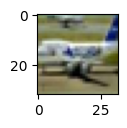

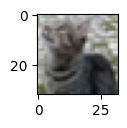

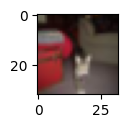

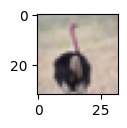

In [ ]:
for i in range(332,336):
   plt.subplot(120+1+i)
   img=X_train[i]
   plt.imshow(img)
   plt.show()

preprocessing the data

In [ ]:
X_train=X_train.reshape(X_train.shape[0],32,32,3)
X_test=X_test.reshape(X_test.shape[0],32,32,3)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test=X_test/255
n_classes=10
print("shape before one-hot encoding:",y_train.shape)
Y_train=np_utils.to_categorical(y_train,n_classes)
Y_test=np_utils.to_categorical(y_test,n_classes)
print("shape after  one-hot encoding:",y_train.shape)


shape before one-hot encoding: (50000, 1)
shape after  one-hot encoding: (50000, 1)


building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
model=Sequential()
#convolutional layers
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
#hidden layer
model.add(Dense(500,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))


#output layer
model.add(Dense(10,activation='softmax'))
#compiling
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
#training the model
model.fit(X_train,Y_train,batch_size=128,epochs=20,validation_data=(X_test,Y_test))

                                                                   





Epoch 1/20
391/391 [==============================] - 860s 2s/step - loss: 1.5081 - accuracy: 0.4519 - val_loss: 1.1651 - val_accuracy: 0.5780
Epoch 2/20
391/391 [==============================] - 806s 2s/step - loss: 1.0937 - accuracy: 0.6126 - val_loss: 0.9395 - val_accuracy: 0.6668
Epoch 3/20
391/391 [==============================] - 707s 2s/step - loss: 0.9321 - accuracy: 0.6743 - val_loss: 0.9214 - val_accuracy: 0.6817
Epoch 4/20
391/391 [==============================] - 744s 2s/step - loss: 0.8049 - accuracy: 0.7181 - val_loss: 0.9147 - val_accuracy: 0.6855
Epoch 5/20
391/391 [==============================] - 712s 2s/step - loss: 0.7086 - accuracy: 0.7520 - val_loss: 0.8374 - val_accuracy: 0.7071
Epoch 6/20
391/391 [==============================] - 702s 2s/step - loss: 0.6140 - accuracy: 0.7862 - val_loss: 0.8327 - val_accuracy: 0.7162
Epoch 7/20
391/391 [==============================] - 698s 2s/step - loss: 0.5343 - accuracy: 0.8119 - val_loss: 0.8655 - val_accuracy: 0.7150

PREDICTING


In [ ]:
classes=range(0,10)
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#zip the names and  classes to make a dictionary of class_labels
class_labels=dict(zip(classes,names))
#generate batch of 9 images to predict
batch=X_test[100:109]
labels= np.argmax(Y_test[100:109],axis=-1)
#make predictions
predictions=model.predict(batch,verbose=1)



1/1 [==============================] - 0s 269ms/step


In [ ]:
print (predictions)

[[2.8446163e-06 2.6592852e-07 5.4753772e-03 1.1656228e-02 8.0327523e-01
  1.8695384e-02 1.5925872e-01 1.6320779e-03 2.2622039e-06 1.5990107e-06]
 [4.5261302e-05 5.8419901e-05 2.5205938e-02 6.3415557e-02 5.6120992e-01
  1.8055294e-01 6.0448185e-02 1.0814227e-01 6.9766177e-04 2.2384731e-04]
 [1.3498580e-11 7.9687668e-10 2.6810774e-09 5.5627784e-06 7.9227490e-08
  1.8512142e-06 9.9999243e-01 1.6859072e-09 7.6272044e-11 1.0606627e-10]
 [9.6301145e-10 2.8193026e-11 4.8135013e-07 9.9698704e-01 3.4721172e-05
  1.6838649e-05 2.9584900e-03 2.1007513e-06 3.1024562e-08 3.6151626e-08]
 [1.7697360e-08 9.9999934e-01 1.8184259e-17 1.0574948e-17 2.0051371e-15
  2.1482988e-19 9.9628489e-20 1.6174495e-13 5.3171232e-07 2.8242029e-08]
 [1.4414196e-06 9.9702841e-01 4.4470778e-09 2.0188523e-08 2.1317961e-08
  2.7251659e-10 7.8030299e-10 8.7136583e-11 2.9701383e-03 6.7581723e-08]
 [4.5048926e-04 2.7853431e-04 3.8618268e-04 6.4266050e-01 1.4792831e-04
  2.1032644e-02 3.3322707e-01 5.8964390e-05 1.3469290e-03 

In [ ]:
for image in predictions:
  print (np.sum(image))



1.0
1.0
0.9999999
0.9999998
0.9999999
1.0000001
1.0
0.9999999
0.99999994


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)


[4 4 6 3 1 1 3 6 8]


final object result

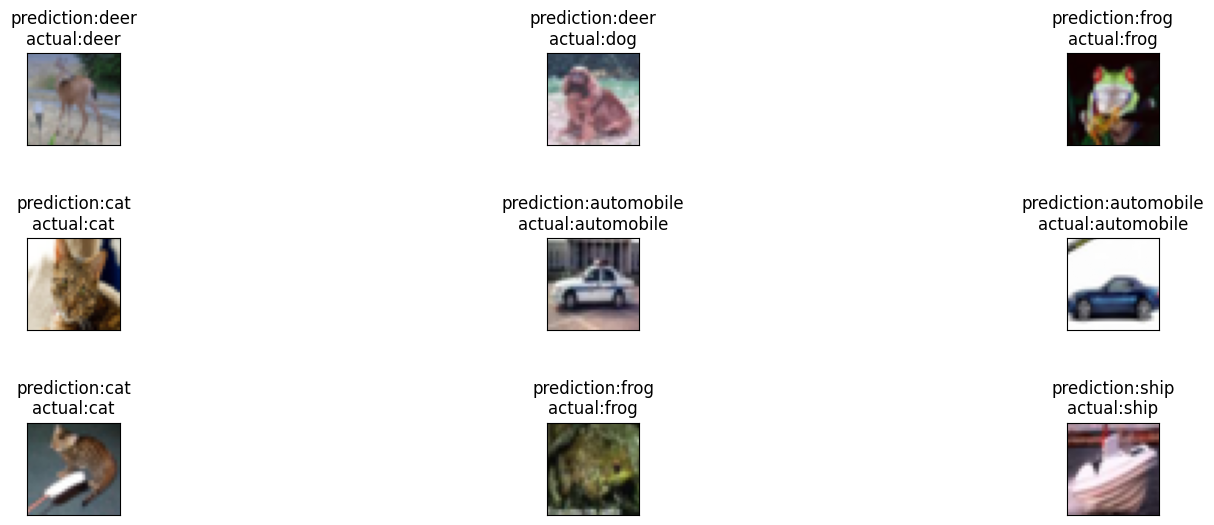

In [28]:
fig,axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title='prediction:{}\nactual:{}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

   #plot the image
  axs[i].imshow(img)
#show the plot
plt.show()